# **The Battle of Neighborhoods Part 1**

# Introduction

**Mexico city** is the capital and largest city of Mexico, and if that wasnt enough it is also the most-populous city in North America, with more than 9 million people. It is known for being a hub for business, finance, arts, culture and economics. Mexico City offers a variety of cuisines: restaurants specializing in the regional cuisines of Mexico's 31 states are available in the city, and the city also has several branches of internationally recognized restaurants. CDMX is also known for having some of the freshest fish and seafood in Mexico's interior. La Nueva Viga Market is the second largest seafood market in the world after the Tsukiji fish market in Japan. 

This means that if you are planning on opening a restaurant on Guadalajara, get ready for a competitive market. New business venutures need to know how to play its cards, therefore they need to carefully examine the data gathered on the city, its population and its preferences to help **reduce** the risk of failure.


 But, how can we do that? How can we use Foursquare location data and machine learning tools to help make **informed decisions** on the apporpiate neighborhood? And this is the problem I present to you, and that I will be addresing in this Capstone proyect.

# Data 

For this proyect we will be using the Foursquare API to get the venues in each district and the data containing the neighborhoods from a [federal database](https://datos.cdmx.gob.mx/explore/dataset/coloniascdmx/table/?location=10,19.36105,-99.14801&dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6ImNvbG9uaWFzY2RteCIsIm9wdGlvbnMiOnt9fSwiY2hhcnRzIjpbeyJhbGlnbk1vbnRoIjp0cnVlLCJ0eXBlIjoiY29sdW1uIiwiZnVuYyI6IkFWRyIsInlBeGlzIjoiZW50aWRhZCIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiM2NmMyYTUifV0sInhBeGlzIjoibm9tYnJlIiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D) which contain the **names of the districts** as well as other information.


So lets start by adding all of the necesary libraries for this proyect

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


Since I wasnt able to import the information directly from the web page (~~sorry~~), we´ll need to download the file, save it locally in your Jupiter Notebook of choice and get the path with `import os`, btw if you have anyidea how to import the table directly from the web please let me know :D

In [3]:
import os
path = os.getcwd()
print(path)

/resources


In [4]:
df = pd.read_csv('/resources/coloniascdmx.csv')
df.head()

,COLONIA,ENTIDAD,Geo Point,Geo Shape,CVE_ALC,ALCALDIA,CVE_COL,SECC_COM,SECC_PAR
0,LOMAS DE CHAPULTEPEC,9.0,"19.4228411174,-99.2157935754","{""type"": ""Polygon"", ""coordinates"": [[[-99.2201...",16,MIGUEL HIDALGO,16-042,"4924, 4931, 4932, 4935, 4936, 4940, 4987","4923, 4937, 4938, 4939, 4942"
1,LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC),9.0,"19.4106158914,-99.2262487268","{""type"": ""Polygon"", ""coordinates"": [[[-99.2296...",16,MIGUEL HIDALGO,16-044,4963,4964
2,DEL BOSQUE (POLANCO),9.0,"19.4342189235,-99.2094037513","{""type"": ""Polygon"", ""coordinates"": [[[-99.2082...",16,MIGUEL HIDALGO,16-026,NaN,"4918, 4919"
3,PEDREGAL DE SANTA URSULA I,9.0,"19.314862237,-99.1477954505","{""type"": ""Polygon"", ""coordinates"": [[[-99.1458...",3,COYOACAN,03-135,"433, 500, 431, 513, 501","424, 425, 426, 430, 499"
4,AJUSCO I,9.0,"19.324571116,-99.1561602234","{""type"": ""Polygon"", ""coordinates"": [[[-99.1585...",3,COYOACAN,03-128,"376, 377, 378, 379, 404, 493, 498",374


Then, lets drop everything besides the column "ALCALDIA" 

In [5]:
df.drop('ENTIDAD', axis=1, inplace=True)
df.drop('Geo Shape', axis=1, inplace=True)
df.drop('CVE_ALC', axis=1, inplace=True)
df.drop('CVE_COL', axis=1, inplace=True)
df.drop('SECC_COM', axis=1, inplace=True)
df.drop('SECC_PAR', axis=1, inplace=True)
df.drop('Geo Point', axis=1, inplace=True)
df.drop('COLONIA', axis=1, inplace=True)

**Disclaimer**

Now you are surely wonder why did I drop the columns "Colonia" (Neighborhood) and "Geo Point", the seem so helpfull, and indeed they do, well, the truth is, I dont know many things, I didnt know how to separate the latitute and longitude values from the "Geo Point" column and I tried to use geo.py for the Neighborhoods and a lot of mistakes happened, so if you know how to do it, I encourage you to do it and to let me know of course.

We check de df

In [6]:
df.head()  # Neighborhoods

,ALCALDIA
0,MIGUEL HIDALGO
1,MIGUEL HIDALGO
2,MIGUEL HIDALGO
3,COYOACAN
4,COYOACAN


Drop the duplicates

In [7]:
df1=df.drop_duplicates('ALCALDIA')
df1

,ALCALDIA
0,MIGUEL HIDALGO
3,COYOACAN
6,VENUSTIANO CARRANZA
24,GUSTAVO A. MADERO
38,TLALPAN
46,XOCHIMILCO
50,MILPA ALTA
62,IZTACALCO
64,AZCAPOTZALCO
68,ALVARO OBREGON


AND we are ready to use `geolocator`

In [8]:
geolocator = Nominatim(user_agent="CDMX_R")

df1['Major_Dist_Coord']= df1['ALCALDIA'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df1[['Latitude', 'Longitude']] = df1['Major_Dist_Coord'].apply(pd.Series)

df1.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df1.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be se

,ALCALDIA,Latitude,Longitude
0,MIGUEL HIDALGO,19.429614,-99.198638
3,COYOACAN,19.328040,-99.151063
6,VENUSTIANO CARRANZA,16.308984,-92.637935
24,GUSTAVO A. MADERO,19.518545,-99.143640
38,TLALPAN,19.200877,-99.217012


Lets check the firs district

In [10]:
address = 'Miguel Hidalgo'

geolocator = Nominatim(user_agent="CDMX_R")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('{} geograpical coordinates are {} latitude and {} longitude'.format(address,latitude, longitude))

Miguel Hidalgo geograpical coordinates are 19.429614049999998 latitude and -99.19863845640572 longitude


And then we create a map of Mexico City Districts with `Folium`

In [11]:
# create map of Guadalajara
map_cdmx = folium.Map(location=[latitude, longitude], zoom_start=10)

 # add markers to map
for lat, lng, label in zip(df1['Latitude'], df1['Longitude'], df1['ALCALDIA']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cdmx) 
    
map_cdmx

Now, we are ready to use Foursquare API

In [12]:
CLIENT_ID = 'UTGWUOUUUA3DUJBME2EWIGXFBOOG4QNSOBQ4SYOPOXRMZYIH' # your Foursquare ID
CLIENT_SECRET = 'RFULILN2BFSJGYY1BSH22NLWA0X4GJIG10TRWKLF3EN3LHWU' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 200
print('Your credentails are CLIENT_ID :{} and CLIENT_SECRET :{}'.format(CLIENT_ID,CLIENT_SECRET))

Your credentails are CLIENT_ID :UTGWUOUUUA3DUJBME2EWIGXFBOOG4QNSOBQ4SYOPOXRMZYIH and CLIENT_SECRET :RFULILN2BFSJGYY1BSH22NLWA0X4GJIG10TRWKLF3EN3LHWU


In [13]:
al_latitude = df1.loc[0, 'Latitude'] #  latitude value
al_longitude = df1.loc[0, 'Longitude'] #  longitude value

al_name = df1.loc[0, 'ALCALDIA'] # neighborhood name

print('{} latitude and longitude values are {} and {}.'.format(al_name,al_latitude,al_longitude))

MIGUEL HIDALGO latitude and longitude values are 19.429614049999998 and -99.19863845640572.


Now lets see some of the venues within 500 meter 

In [14]:
LIMIT = 200
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    al_latitude, 
    al_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=UTGWUOUUUA3DUJBME2EWIGXFBOOG4QNSOBQ4SYOPOXRMZYIH&client_secret=RFULILN2BFSJGYY1BSH22NLWA0X4GJIG10TRWKLF3EN3LHWU&v=20180604&ll=19.429614049999998,-99.19863845640572&radius=1000&limit=200'

In [15]:
results = requests.get(url).json()


In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Parque Lincoln,Park,19.429555,-99.197037
1,Amorino,Ice Cream Shop,19.429808,-99.196587
2,Alpha Store (Dockers),Men's Store,19.427747,-99.197966
3,Julio Verne 42,Smoke Shop,19.428579,-99.197279
4,Limantour,Cocktail Bar,19.430369,-99.197102


In [18]:
print (nearby_venues['categories'].value_counts()[0:10])

Mexican Restaurant    9
Jewelry Store         5
French Restaurant     3
Bookstore             3
Italian Restaurant    3
Boutique              3
Ice Cream Shop        3
Hotel                 3
Park                  3
Cocktail Bar          2
Name: categories, dtype: int64


Now lets see the districts in CDMX

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [20]:
CDMX_venues = getNearbyVenues(names=df1['ALCALDIA'],
                                   latitudes=df1['Latitude'],
                                   longitudes=df1['Longitude']
                                  )

MIGUEL HIDALGO
COYOACAN
VENUSTIANO CARRANZA
GUSTAVO A. MADERO
TLALPAN
XOCHIMILCO
MILPA ALTA
IZTACALCO
AZCAPOTZALCO
ALVARO OBREGON
CUAUHTEMOC
TLAHUAC
CUAJIMALPA DE MORELOS
IZTAPALAPA
BENITO JUAREZ
LA MAGDALENA CONTRERAS


We want to open a Restaurant, so lets see only this venues 

In [21]:
CDMX_Restaurants_only = CDMX_venues[CDMX_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
CDMX_Restaurants_only.index = np.arange(1, len(CDMX_Restaurants_only )+1)

In [22]:
print (CDMX_Restaurants_only['Venue Category'].value_counts())

Mexican Restaurant               24
Seafood Restaurant                9
Restaurant                        7
Sushi Restaurant                  5
Japanese Restaurant               4
Italian Restaurant                4
French Restaurant                 3
Mediterranean Restaurant          2
Spanish Restaurant                2
Fast Food Restaurant              1
Portuguese Restaurant             1
Eastern European Restaurant       1
Vegetarian / Vegan Restaurant     1
Brazilian Restaurant              1
Argentinian Restaurant            1
American Restaurant               1
African Restaurant                1
Name: Venue Category, dtype: int64


In [23]:
print('There are {} uniques categories.'.format(len(CDMX_Restaurants_only['Venue Category'].unique())))

There are 17 uniques categories.


In [24]:
# create a dataframe of top 10 categories
CDMX_Top10 = CDMX_Restaurants_only['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
CDMX_Top10=CDMX_Top10.reset_index()

CDMX_Top10.rename(index=str, columns={"index": "Category", "frequency": "Frequency"}, inplace=True)
CDMX_Top10

,Category,Frequency
0,Mexican Restaurant,24
1,Seafood Restaurant,9
2,Restaurant,7
3,Sushi Restaurant,5
4,Japanese Restaurant,4
5,Italian Restaurant,4
6,French Restaurant,3
7,Mediterranean Restaurant,2
8,Spanish Restaurant,2
9,Fast Food Restaurant,1


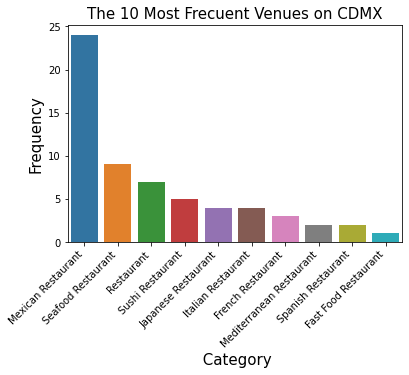

<Figure size 1296x504 with 0 Axes>

In [26]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Category", y="Frequency", data=CDMX_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('The 10 Most Frecuent Venues on CDMX', fontsize=15)
plt.xlabel(" Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
#plt.savefig("Most_Frecuency_CDMX.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

Lets start analysing each district

In [27]:
CDMX_Restaurants_only.head()


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,MIGUEL HIDALGO,19.429614,-99.198638,Lampuga,19.430796,-99.197983,Mediterranean Restaurant
2,MIGUEL HIDALGO,19.429614,-99.198638,El Japonez,19.430345,-99.198429,Japanese Restaurant
3,MIGUEL HIDALGO,19.429614,-99.198638,Casa Portuguesa,19.429887,-99.197323,Portuguese Restaurant
4,MIGUEL HIDALGO,19.429614,-99.198638,La Barra De Fran,19.430538,-99.200289,Spanish Restaurant
5,MIGUEL HIDALGO,19.429614,-99.198638,Dulce Patria,19.431460,-99.197618,Mexican Restaurant


In [28]:
CDMX_Restaurants = CDMX_Restaurants_only.groupby(['City'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())


In [29]:
CDMX_Restaurants

City
AZCAPOTZALCO       9
COYOACAN           2
CUAUHTEMOC         5
IZTACALCO         10
IZTAPALAPA         4
MIGUEL HIDALGO    31
TLAHUAC            6
XOCHIMILCO         1
Name: Venue Category, dtype: int64

In [30]:
CDMX_Restaurants_df  = CDMX_Restaurants.to_frame().reset_index()
CDMX_Restaurants_df.columns = ['City', 'Number of Restaurant']
CDMX_Restaurants_df.index = np.arange(1, len(CDMX_Restaurants_df)+1)
list_rest_no =CDMX_Restaurants_df['Number of Restaurant'].to_list()
list_dist =CDMX_Restaurants_df['City'].to_list()

In [31]:
# one hot encoding
CDMX_onehot = pd.get_dummies(CDMX_Restaurants_only[['Venue Category']], prefix="", prefix_sep="")

# add district column back to dataframe
CDMX_onehot['City'] = CDMX_Restaurants_only['City'] 

col_name='City'
first_col = CDMX_onehot.pop(col_name)

CDMX_onehot_df =CDMX_onehot.insert(0, col_name, first_col)
CDMX_onehot.head()

,City,African Restaurant,American Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Portuguese Restaurant,Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant
1,MIGUEL HIDALGO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,MIGUEL HIDALGO,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,MIGUEL HIDALGO,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,MIGUEL HIDALGO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,MIGUEL HIDALGO,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0



Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [32]:
CDMX_grouped = CDMX_onehot.groupby('City').mean().reset_index()
CDMX_grouped

,City,African Restaurant,American Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Portuguese Restaurant,Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant
0,AZCAPOTZALCO,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.111111,0.000000,0.666667,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000
1,COYOACAN,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
2,CUAUHTEMOC,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.200000,0.400000,0.000000,0.000000,0.200000,0.000000,0.200000,0.000000
3,IZTACALCO,0.0,0.1,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.400000,0.000000,0.000000,0.200000,0.000000
4,IZTAPALAPA,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
5,MIGUEL HIDALGO,0.0,0.0,0.032258,0.032258,0.032258,0.0,0.096774,0.096774,0.096774,0.032258,0.193548,0.032258,0.096774,0.096774,0.064516,0.064516,0.032258
6,TLAHUAC,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.166667,0.000000,0.000000,0.666667,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000
7,XOCHIMILCO,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


And lets print each district with its 5 most common venues

In [33]:
num_top_venues = 5

for hood in CDMX_grouped['City']:
    print("----"+hood+"----")
    temp = CDMX_grouped[CDMX_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----AZCAPOTZALCO----
                      venue  freq
0        Mexican Restaurant  0.67
1        Seafood Restaurant  0.22
2       Japanese Restaurant  0.11
3  Mediterranean Restaurant  0.00
4          Sushi Restaurant  0.00


----COYOACAN----
                      venue  freq
0        Seafood Restaurant   0.5
1        Mexican Restaurant   0.5
2        African Restaurant   0.0
3  Mediterranean Restaurant   0.0
4          Sushi Restaurant   0.0


----CUAUHTEMOC----
                      venue  freq
0        Mexican Restaurant   0.4
1  Mediterranean Restaurant   0.2
2          Sushi Restaurant   0.2
3        Seafood Restaurant   0.2
4        African Restaurant   0.0


----IZTACALCO----
                  venue  freq
0            Restaurant   0.4
1    Mexican Restaurant   0.2
2      Sushi Restaurant   0.2
3  Fast Food Restaurant   0.1
4   American Restaurant   0.1


----IZTAPALAPA----
                      venue  freq
0        Mexican Restaurant  0.75
1        Seafood Restaurant  0.25
2   

In [34]:
#let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [103]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = CDMX_grouped['City']

for ind in np.arange(CDMX_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(CDMX_grouped.iloc[ind, :], num_top_venues)
    
city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AZCAPOTZALCO,Mexican Restaurant,Seafood Restaurant,Japanese Restaurant,French Restaurant,American Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
1,COYOACAN,Seafood Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,American Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant,Fast Food Restaurant,Japanese Restaurant
2,CUAUHTEMOC,Mexican Restaurant,Seafood Restaurant,Mediterranean Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,American Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant
3,IZTACALCO,Restaurant,Mexican Restaurant,Sushi Restaurant,American Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant
4,IZTAPALAPA,Mexican Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,American Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant,Fast Food Restaurant,Japanese Restaurant


In [104]:
# set number of clusters
kclusters = 4

CDMX_grouped_clustering = CDMX_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(CDMX_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 3, 2, 1, 3, 1, 0], dtype=int32)

In [105]:
# add clustering labels

city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

CDMX_merged = df1

CDMX_merged.rename(columns={'ALCALDIA':'City'}, inplace=True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
CDMX_merged = CDMX_merged.join(city_venues_sorted.set_index('City'), on='District')

CDMX_merged.head() # check the last columns!


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,MIGUEL HIDALGO,19.429614,-99.198638,3.0,Mexican Restaurant,Japanese Restaurant,Seafood Restaurant,Restaurant,Italian Restaurant,French Restaurant,Spanish Restaurant,Sushi Restaurant,Eastern European Restaurant,Argentinian Restaurant
3,COYOACAN,19.328040,-99.151063,1.0,Seafood Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,American Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant,Fast Food Restaurant,Japanese Restaurant
6,VENUSTIANO CARRANZA,16.308984,-92.637935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,GUSTAVO A. MADERO,19.518545,-99.143640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,TLALPAN,19.200877,-99.217012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
CDMX_merged=CDMX_merged.dropna()
CDMX_merged.head()


,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,MIGUEL HIDALGO,19.429614,-99.198638,3.0,Mexican Restaurant,Japanese Restaurant,Seafood Restaurant,Restaurant,Italian Restaurant,French Restaurant,Spanish Restaurant,Sushi Restaurant,Eastern European Restaurant,Argentinian Restaurant
3,COYOACAN,19.328040,-99.151063,1.0,Seafood Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,American Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant,Fast Food Restaurant,Japanese Restaurant
46,XOCHIMILCO,19.236978,-99.082300,0.0,African Restaurant,Italian Restaurant,American Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant
62,IZTACALCO,19.398975,-99.095312,2.0,Restaurant,Mexican Restaurant,Sushi Restaurant,American Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant
64,AZCAPOTZALCO,19.485815,-99.184206,1.0,Mexican Restaurant,Seafood Restaurant,Japanese Restaurant,French Restaurant,American Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant


In [107]:
CDMX_merged['Cluster Labels']= CDMX_merged['Cluster Labels'].astype(int)


In [108]:
CDMX_merged

,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,MIGUEL HIDALGO,19.429614,-99.198638,3,Mexican Restaurant,Japanese Restaurant,Seafood Restaurant,Restaurant,Italian Restaurant,French Restaurant,Spanish Restaurant,Sushi Restaurant,Eastern European Restaurant,Argentinian Restaurant
3,COYOACAN,19.328040,-99.151063,1,Seafood Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,American Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant,Fast Food Restaurant,Japanese Restaurant
46,XOCHIMILCO,19.236978,-99.082300,0,African Restaurant,Italian Restaurant,American Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant
62,IZTACALCO,19.398975,-99.095312,2,Restaurant,Mexican Restaurant,Sushi Restaurant,American Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant
64,AZCAPOTZALCO,19.485815,-99.184206,1,Mexican Restaurant,Seafood Restaurant,Japanese Restaurant,French Restaurant,American Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
71,CUAUHTEMOC,19.441613,-99.151864,3,Mexican Restaurant,Seafood Restaurant,Mediterranean Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,American Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant
73,TLAHUAC,19.269504,-99.004097,1,Mexican Restaurant,Seafood Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,American Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant,Fast Food Restaurant
97,IZTAPALAPA,19.342829,-99.046892,1,Mexican Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,American Restaurant,Argentinian Restaurant,Brazilian Restaurant,Eastern European Restaurant,Fast Food Restaurant,Japanese Restaurant


In [110]:
# create map
map_CDMX10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(CDMX_merged['Latitude'], 
                                  CDMX_merged['Longitude'], 
                                  CDMX_merged['District'], 
                                  CDMX_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*1.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_CDMX10)
       
map_CDMX10

# And we are done, hope you like it or at least learned somehting, if you have any sugestions or questions I´ll leave my mail in here, Thanks

email : epastaa@gmail.com